In [436]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [437]:
house_df = pd.read_csv("complete_houses_mod.csv", index_col="id")

In [438]:
house_df.shape

(9344, 16)

In [391]:
house_df.columns

Index(['Unnamed: 0', 'Zip', 'Price', 'Price of square meter', 'Living area',
       'Number of rooms', 'Garden surface', 'Terrace surface', 'Open fire',
       'Surface of the land', 'Number of facades', 'Swimming pool',
       'Building Cond. values', 'Kitchen values', 'Primary energy consumption',
       'Energy efficiency'],
      dtype='object')

In [392]:
house_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9344.0,4671.500000,2697.524791,0.00,2335.75,4671.5,7007.25,9343.0
Zip,9344.0,5029.633562,2987.545825,1000.00,2018.00,4500.0,8200.00,9992.0
Price,9344.0,481707.847603,370932.451928,10000.00,250000.00,380000.0,570000.00,2500000.0
Price of square meter,9344.0,2220.248567,4235.489422,2.45,1500.00,2000.0,2650.00,399000.0
Living area,9344.0,245.172089,1827.497914,1.00,145.00,189.0,260.00,175173.0
Number of rooms,9344.0,3.739084,1.574912,1.00,3.00,3.0,4.00,25.0
Garden surface,9344.0,444.880244,9447.784677,0.00,0.00,48.0,270.00,900000.0
Terrace surface,9344.0,20.826413,52.765906,0.00,0.00,12.0,26.00,3286.0
Open fire,9344.0,0.091396,0.318529,0.00,0.00,0.0,0.00,10.0
Surface of the land,9344.0,1205.644906,5047.819027,1.00,210.00,460.5,972.00,291294.0


In [439]:
# house_df.drop('Unnamed: 0', inplace=True, axis=1)
# house_df.drop("Price of square meter", inplace=True, axis=1)

In [440]:
from typing import List
# Remove outliers
def remove_outliers(df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [441]:
# house_df = remove_outliers(house_df, ['Living area','Surface of the land','Garden surface','Terrace surface','Primary energy consumption','Number of facades','Number of rooms'], 3)
# # house_df = remove_outliers(house_df, ['Garden surface','Terrace surface'], 2)

Working on column: Living area
Working on column: Surface of the land
Working on column: Garden surface
Working on column: Terrace surface
Working on column: Primary energy consumption
Working on column: Number of facades
Working on column: Number of rooms


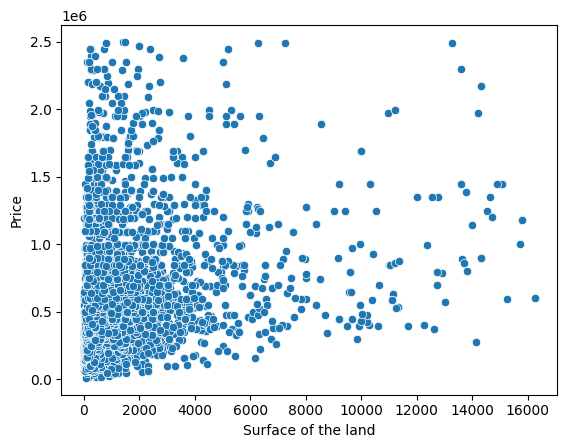

In [396]:
sns.scatterplot(x='Surface of the land', y="Price", data=house_df)
plt.show()

In [397]:
trans = MinMaxScaler()
d = trans.fit_transform(house_df)
house_df = pd.DataFrame(d, columns=house_df.columns)
print(house_df)

           Zip     Price  Living area  Number of rooms  Garden surface  \
0     0.085632  0.136145     0.052508         0.285714        0.009827   
1     0.800712  0.246988     0.053975         0.285714        0.026205   
2     0.344751  0.055823     0.030507         0.142857        0.001638   
3     0.478203  0.130522     0.061015         0.428571        0.045729   
4     0.021130  0.214859     0.074215         0.428571        0.000000   
...        ...       ...          ...              ...             ...   
8947  0.280249  0.149490     0.047521         0.285714        0.026599   
8948  0.280249  0.149592     0.047521         0.285714        0.026533   
8949  0.280249  0.150229     0.047521         0.285714        0.026533   
8950  0.837411  0.159036     0.053975         0.285714        0.000000   
8951  0.997665  0.168072     0.073042         0.285714        0.027516   

      Terrace surface  Open fire  Surface of the land  Number of facades  \
0            0.142857        0.0   

In [398]:
# house_df = house_df[house_df['Price']<=0.6]

In [442]:
y = house_df[['Price']]
X = house_df[[
       'Building Cond. values',
       'Number of facades',
       'Number of rooms',
       'Living area',
       'Kitchen values',
       'Surface of the land',
       'Terrace surface',
       'Garden surface',
       'Open fire',
       'Swimming pool',
       'Primary energy consumption'
       ]]

In [443]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7) 

In [401]:
# min_max_scaler = MinMaxScaler()
# X_train_minmax = min_max_scaler.fit_transform(X_train)
# X_train_minmax

# d = preprocessing.normalize(X_train)
# scaled_df = pd.DataFrame(d, columns=X_train.columns)
# print(scaled_df)

# scaler = preprocessing.MinMaxScaler()
# d = scaler.fit_transform(X_train)
# scaled_df = pd.DataFrame(d, columns=X_train.columns)
# print(scaled_df)

# trans = MinMaxScaler()
# X_train = trans.fit_transform(X_train)

In [462]:
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()

reg = lr.fit(X_train, y_train)

y_predicted = lr.predict(X_test)

rmse = mean_squared_error(y_test, y_predicted)
print("rmse: ",rmse)

r2 = r2_score(y_predicted, y_test)
print("r2: ",r2)

# score = reg.score(X, y)
# print("score: ", score)

score2 = lr.score(X_test, y_test)
print("score2: ", score2)

rmse:  63665565693.60465
r2:  -0.11752295937981239
score2:  0.4681342374214478


In [428]:
coeff_df = pd.DataFrame(lr.coef_.T,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Number of rooms,0.118571
Living area,1.305661
Kitchen values,0.056830
Terrace surface,0.029819
Swimming pool,0.065445


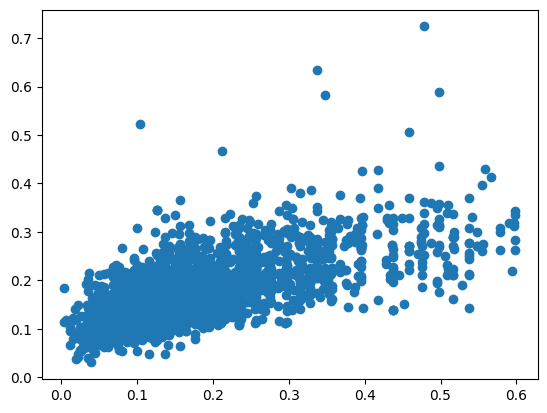

In [429]:
plt.scatter(y_test,y_predicted)

<Axes: xlabel='Price'>

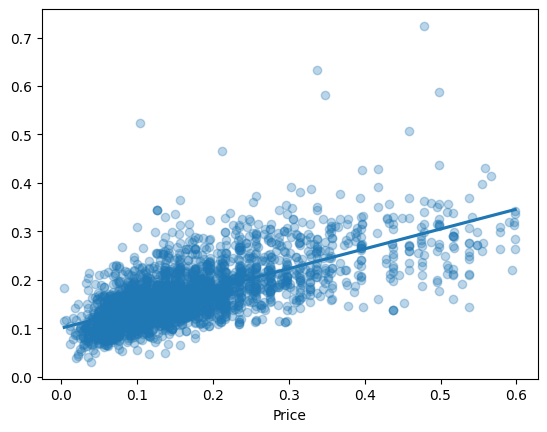

In [430]:
sns.regplot(x=y_test,y=y_predicted,ci=None,scatter_kws={'alpha': 0.3})

/var/folders/lh/rbpzcs3522qg45v9lc_xvgyc0000gn/T/ipykernel_49648/2462598573.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_predicted),bins=50)


<Axes: ylabel='Density'>

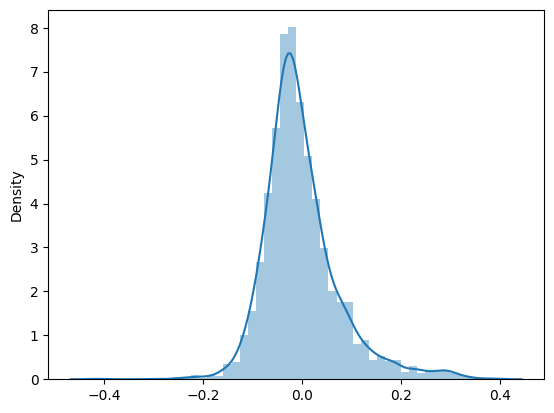

In [432]:
sns.distplot((y_test-y_predicted),bins=50)

In [407]:
house_df.skew()

Zip                           0.175357
Price                         1.473246
Living area                   5.264345
Number of rooms               0.821073
Garden surface                8.732888
Terrace surface               2.362825
Open fire                     6.650667
Surface of the land           5.345016
Number of facades             0.153676
Swimming pool                 5.179667
Building Cond. values        -0.523366
Kitchen values                0.553209
Primary energy consumption    0.764483
Energy efficiency            -0.255693
dtype: float64

In [410]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# # Load the digits dataset
# digits = load_digits()
# X = digits.images.reshape((len(digits.images), -1))
# y = digits.target

# # Create the RFE object and rank each pixel
# svc = SVC(kernel="linear", C=1)
# rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
# rfe.fit(X, y)
# ranking = rfe.ranking_.reshape(house_df.shape)

# # Plot pixel ranking
# plt.matshow(ranking, cmap=plt.cm.Blues)
# plt.colorbar()
# plt.title("Ranking of pixels with RFE")
# plt.show()

In [417]:
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# # create pipeline
# rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# model = DecisionTreeClassifier()
# pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# # evaluate model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.889 (0.029)


In [424]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 5.000
Column: 1, Selected False, Rank: 4.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 6.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 3.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 2.000


In [ ]:
X = house_df[[
    #    'Building Cond. values',
    #    'Number of facades',
       'Number of rooms',
       'Living area',
       'Kitchen values',
    #    'Surface of the land',
       'Terrace surface',
       # 'Garden surface',
    #    'Open fire',
       'Swimming pool',
    #    'Primary energy consumption'
       ]]

In [464]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

#burada modelleri bir listenin içerisine alıp parametreleri ile beraber tanımlıyoruz.
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree (CART)',DecisionTreeClassifier())) 
models.append(('K-NN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
# models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('BaggingClassifier', BaggingClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('MLPClassifier', MLPClassifier()))

#burada bir döngü vasıtasıyla tek tek bütün modelleri deneyerek sonuçları karşılaştırıyoruz. 
for name, model in models:
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # print(f"{name} -> ACC: {r2_score(y_test, y_pred)}")
    print(f"{name} -> ACC: {model.score(X_test, y_test)}")

Linear Regression -> ACC: 0.4681342374214478


/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/

Logistic Regression -> ACC: 0.02131979695431472
Naive Bayes -> ACC: 0.0077834179357022
Decision Tree (CART) -> ACC: 0.10118443316412859
K-NN -> ACC: 0.026395939086294416


/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM -> ACC: 0.01996615905245347


/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier -> ACC: 0.018612521150592216


/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier -> ACC: 0.10524534686971235


/var/folders/lh/rbpzcs3522qg45v9lc_xvgyc0000gn/T/ipykernel_49648/719218740.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(X_train, y_train)


RandomForestClassifier -> ACC: 0.116751269035533


/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier -> ACC: 0.025380710659898477


/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [457]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree (CART)',DecisionTreeClassifier())) 
models.append(('K-NN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
# models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('BaggingClassifier', BaggingClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('MLPClassifier', MLPClassifier()))

for name, model in models:
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} -> ACC: {r2_score(y_test, y_pred)}")

Linear Regression -> ACC: 0.4681342374214478


/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/

Logistic Regression -> ACC: 0.03813511136432579
Naive Bayes -> ACC: -0.24543566614815981
Decision Tree (CART) -> ACC: 0.0900484009725826
K-NN -> ACC: -0.05036432365771093


/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM -> ACC: -0.06574415912517106


/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier -> ACC: 0.2295869835918677


/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier -> ACC: 0.13304151585241353


/var/folders/lh/rbpzcs3522qg45v9lc_xvgyc0000gn/T/ipykernel_49648/2060873470.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(X_train, y_train)


RandomForestClassifier -> ACC: 0.2979063254125789


/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier -> ACC: -0.12309448427897784


/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [456]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",r2_score(y_test, y_pred))

Accuracy: 0.15895790507291474
